# Analysis of Home Prices



**Authors:** Robin Hurtado, Sukhdeep Mahli, Rayaan Mamoon

**Intro:** On Kaggle, we saw data about home prices based on other factors, and we are using this file to analyze it.


**Choice of dataset** - [US_House_Price.csv](https://raw.githubusercontent.com/rphurtado/datascienceproject/main/US_House_Price.csv)  

*from Kaggle [Factors Influencing Us House Prices](https://www.kaggle.com/datasets/jyotsnagurjar/factors-influencing-us-house-prices)*  

**What it is you are going to predict** - We are predicting the future home price index  

**What features you plan to use as predictors**
 - 'const_price_index'
 - 'GDP'
 - 'housing_subsidies'
some preprocessing

**Some exploration and visualization**

We created a pairplot to identify the relationship between numeric values. Also, generated a heatmap to describe the correlation of our datase to visualize the connection of the variables.

**Preliminary work on machine learning; such as test/train dataset split**

We perfoformed machine learning steps like partitioning the data into training.We used KNNeighborsRegressor for traning the model.


### Loading the Data

In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
scaler = StandardScaler()

In [5]:

file = "https://raw.githubusercontent.com/rphurtado/datascienceproject/main/US_House_Price.csv"
df = pd.read_csv(file)



In [6]:
print(df)

           DATE  building_permits  const_price_index  delinquency_rate  \
0    2003-01-01              1808            144.400              1.97   
1    2003-02-01              1854            145.200              1.97   
2    2003-03-01              1757            145.200              1.97   
3    2003-04-01              1803            145.900              1.83   
4    2003-05-01              1835            145.800              1.83   
..          ...               ...                ...               ...   
235  2022-08-01              1586            342.753              1.85   
236  2022-09-01              1588            336.464              1.85   
237  2022-10-01              1555            333.796              1.78   
238  2022-11-01              1402            330.369              1.78   
239  2022-12-01              1409            326.449              1.78   

           GDP  house_for_sale_or_sold  housing_subsidies   income  \
0    14614.141                      76   

### Exploring and Visualizing the Data

In [7]:
print(df.head())
print(df.describe())

         DATE  building_permits  const_price_index  delinquency_rate  \
0  2003-01-01              1808              144.4              1.97   
1  2003-02-01              1854              145.2              1.97   
2  2003-03-01              1757              145.2              1.97   
3  2003-04-01              1803              145.9              1.83   
4  2003-05-01              1835              145.8              1.83   

         GDP  house_for_sale_or_sold  housing_subsidies   income  \
0  14614.141                      76              25.93  10710.4   
1  14614.141                      82              25.93  10674.0   
2  14614.141                      98              25.93  10696.5   
3  14743.567                      91              25.93  10752.7   
4  14743.567                     101              25.93  10832.0   

   interest_rate  mortgage_rate  construction_unit  total_houses  \
0           1.24         5.9160               1654      111278.0   
1           1.26      

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    240 non-null    object 
 1   building_permits        240 non-null    int64  
 2   const_price_index       240 non-null    float64
 3   delinquency_rate        240 non-null    float64
 4   GDP                     240 non-null    float64
 5   house_for_sale_or_sold  240 non-null    int64  
 6   housing_subsidies       240 non-null    float64
 7   income                  240 non-null    float64
 8   interest_rate           240 non-null    float64
 9   mortgage_rate           240 non-null    float64
 10  construction_unit       240 non-null    int64  
 11  total_houses            240 non-null    float64
 12  total_const_spending    240 non-null    float64
 13  unemployment_rate       240 non-null    float64
 14  urban_population        240 non-null    fl

In [9]:
print(df.isnull().sum())

DATE                      0
building_permits          0
const_price_index         0
delinquency_rate          0
GDP                       0
house_for_sale_or_sold    0
housing_subsidies         0
income                    0
interest_rate             0
mortgage_rate             0
construction_unit         0
total_houses              0
total_const_spending      0
unemployment_rate         0
urban_population          0
home_price_index          0
dtype: int64


In [10]:
#casting date to numeric to create correlation table
df_all_num_data = df.copy()
df_all_num_data['DATE'] = pd.to_datetime(df_all_num_data['DATE']).dt.strftime('%Y%m%d').astype(int)
print(df_all_num_data)

         DATE  building_permits  const_price_index  delinquency_rate  \
0    20030101              1808            144.400              1.97   
1    20030201              1854            145.200              1.97   
2    20030301              1757            145.200              1.97   
3    20030401              1803            145.900              1.83   
4    20030501              1835            145.800              1.83   
..        ...               ...                ...               ...   
235  20220801              1586            342.753              1.85   
236  20220901              1588            336.464              1.85   
237  20221001              1555            333.796              1.78   
238  20221101              1402            330.369              1.78   
239  20221201              1409            326.449              1.78   

           GDP  house_for_sale_or_sold  housing_subsidies   income  \
0    14614.141                      76             25.930  10710.

Identifying Predictors

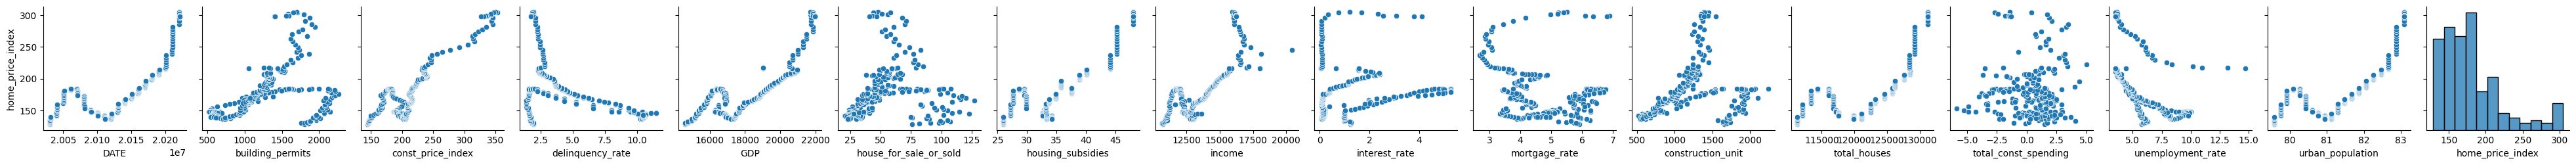

In [11]:
# Display smaller pairplot showing how the features relate specifically to the planned target variable, 'home_price_index'
sns.pairplot(df_all_num_data, y_vars='home_price_index')
plt.show()

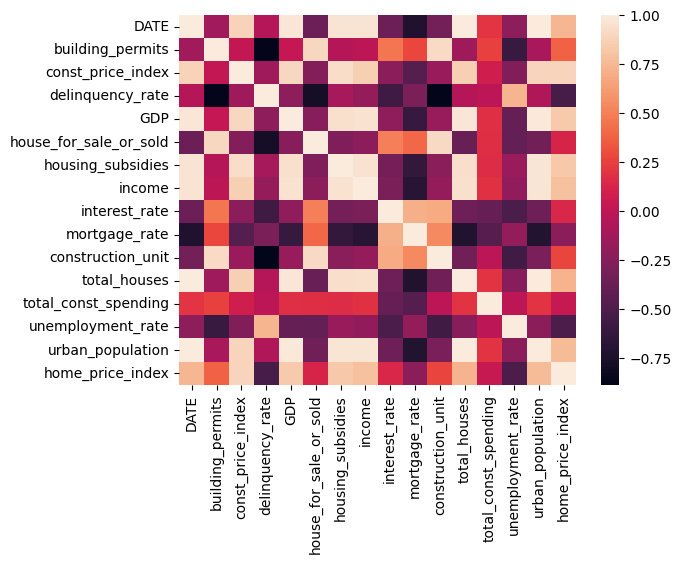

In [12]:
#Display correlation matrix heat map to visualize which variables have the strongest relationships
corr = df_all_num_data.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)
plt.show()

In [13]:
#Display correlation matrix to easier quantify the correlations to double check the negative relationships between the features and target 'home_price_matrix'

print(corr['home_price_index'])

DATE                      0.741325
building_permits          0.381115
const_price_index         0.888823
delinquency_rate         -0.535645
GDP                       0.837699
house_for_sale_or_sold    0.122313
housing_subsidies         0.828885
income                    0.788287
interest_rate             0.135246
mortgage_rate            -0.218551
construction_unit         0.268593
total_houses              0.720495
total_const_spending      0.037852
unemployment_rate        -0.505807
urban_population          0.763985
home_price_index          1.000000
Name: home_price_index, dtype: float64


From this it is easier to see that the strongest relationships occur between target 'home price index' and the features 'const_price_index', 'GDP', and 'housing_subsidies.  Strongest negative predictors appear to be 'delinquency_rate and unemployment_rate, though the correlations do not appear as strong.

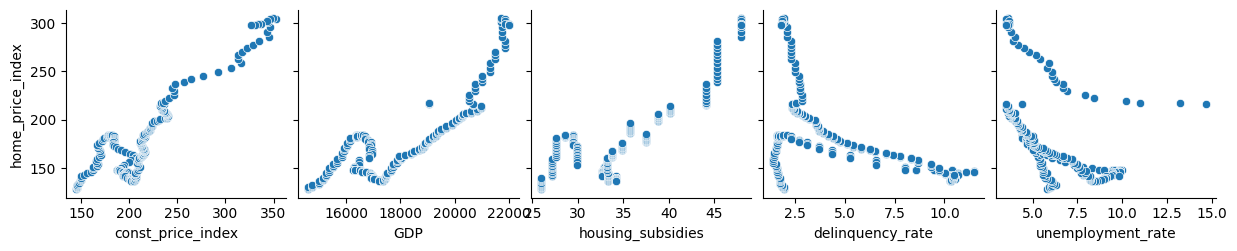

In [14]:
#plot the top positive and negative predictors to narrow down which to choose

hi_corr_predictors = ['const_price_index', 'GDP', 'housing_subsidies', 'delinquency_rate', 'unemployment_rate']
sns.pairplot(df_all_num_data, x_vars = hi_corr_predictors , y_vars='home_price_index')
plt.show()

From this it is easier to see that the relationships occur between target 'home price index' and the features 'const_price_index', 'GDP', and 'housing_subsidies.

### Scatter plot of the 3 most correlated features with standardization


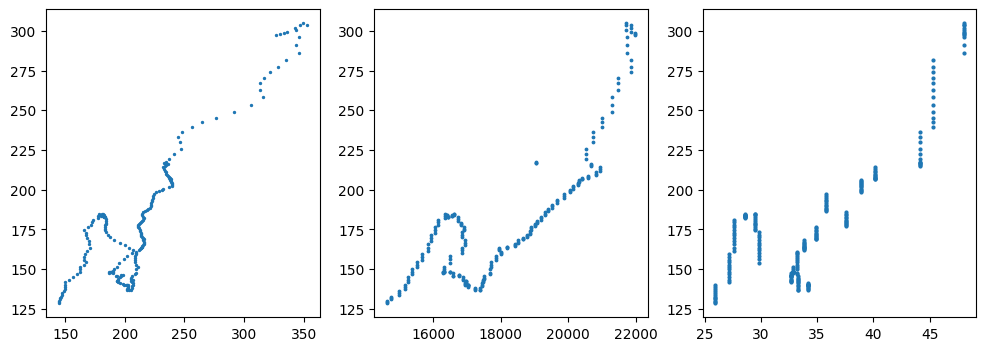

In [15]:
hi_corr_features = ['const_price_index', 'GDP', 'housing_subsidies']

x = df[hi_corr_features].values
y = df['home_price_index'].values

#standardization
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

ax[0].scatter(x[:,0], y, s=2)
ax[1].scatter(x[:,1], y, s=3)
ax[2].scatter(x[:,2], y, s=4)
plt.show()

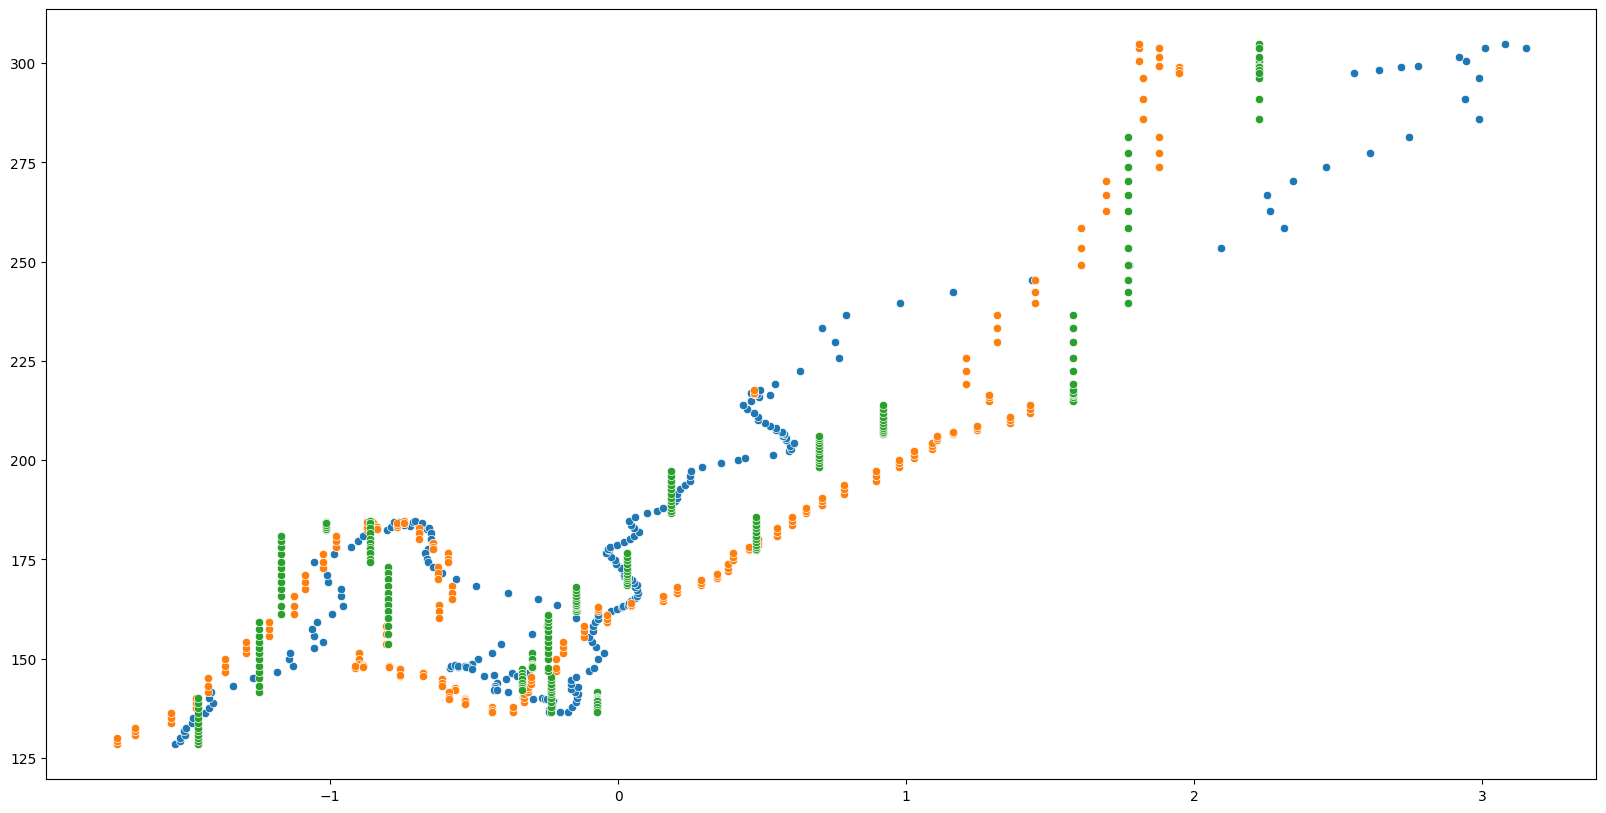

In [16]:
#together

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(x_std.shape[1]):
    sns.scatterplot(x=x_std[:, i], y=y, ax=ax, legend='auto')
plt.show()


## Prepare data for machine learning

So the three features we want to explore are going to be our predictors.  They are:
 - 'const_price_index'  
 - 'GDP'  
 - 'housing_subsidies'

And our target variable is:
 - 'home_price_index'

In [17]:
# for repeatability
np.random.seed(42)

Define function for calculating RMSE for error checking

Split the data into training and test sets, and scale

In [18]:
predictors = ['const_price_index', 'GDP', 'housing_subsidies']

X = df_all_num_data[predictors].values
y = df['home_price_index'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Using 80/20 because data size is fairly small.  maybe try again with a 70/30 split to see how that does

# scale
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Prepare model for training.  Using knn default number of neigbors of 5 and brute algorithm.

In [19]:
#train cusing scikit kneighborsregressor
knn = KNeighborsRegressor(algorithm = 'brute')
knn.fit(X_train, y_train)

knnPredictions = knn.predict(X_test)
# Get the RMSE

kneighborsregressor_rmse = np.sqrt(mean_squared_error(y_test, knnPredictions))
print("kneighborsregressor RMSE: ", kneighborsregressor_rmse)

kneighborsregressor RMSE:  3.4435502290514117


Predict using trained knn model and check error

In [20]:
#predict
predictions = knn.predict(X_test)

In [21]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [22]:
#calculate RMSE
rmse = rmse(predictions, y_test)

#report RMSE
print('RMSE, brute, k=5: {:0.1f}'.format(rmse))

RMSE, brute, k=5: 3.4


Visualize knn predictions vs actual

<Axes: >

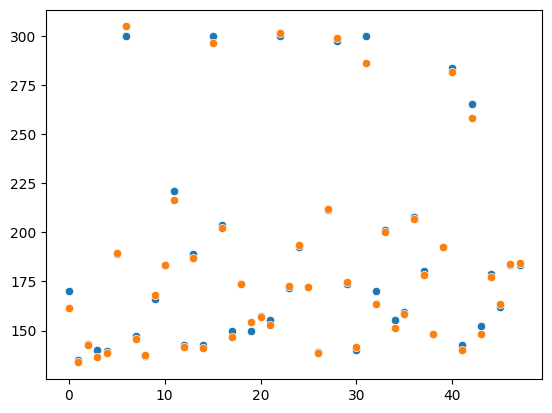

In [23]:
#graphing predictions and y_test
sns.scatterplot(predictions)
sns.scatterplot(y_test)

Train Decision Tree Regression Model


Rmse Decision Tree: 3.815017618870411


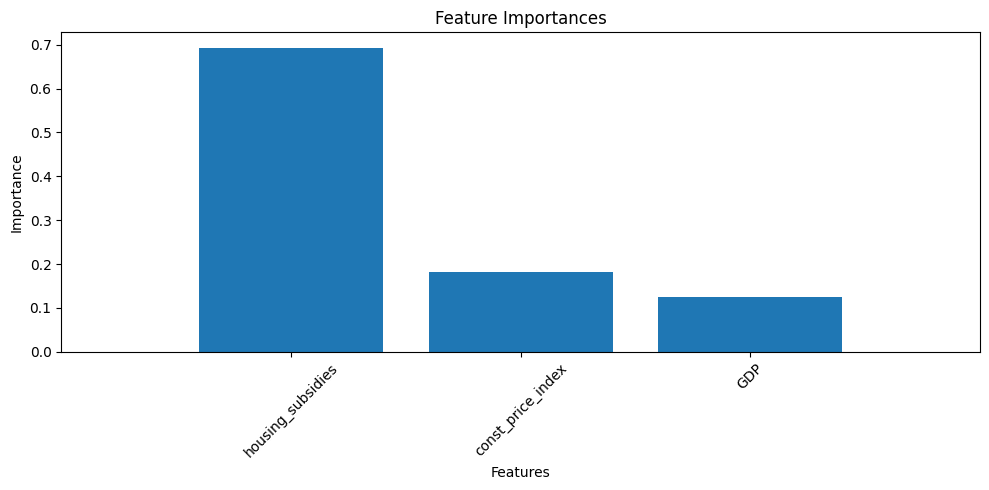

In [24]:
# Implementing decision tree to predict Home prices
#initializing the decision tree
predictors = ['const_price_index', 'GDP','housing_subsidies']

X = df[predictors].values
y = df['home_price_index'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

decision_tree_initialization = DecisionTreeRegressor(random_state=42)

decision_tree_initialization.fit(X_train, y_train)
importances = decision_tree_initialization.feature_importances_


decision_tree_Predictions = decision_tree_initialization.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, decision_tree_Predictions))
print("Rmse Decision Tree:", rmse)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [predictors[i] for i in indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Implementation of Random Forests

In [25]:
# -------------testing Random Forests model-----------
# Intialize the model

randomForest = RandomForestRegressor(random_state=42)

# Traning
randomForest.fit(X_train, y_train)

randomForestPredictions = randomForest.predict(X_test)

# Print the predicted home prices
# print("Predicted Home Prices: ")

# for p in randomForestPredictions:
#   print(p)


# printing actual home prices and predicted home prices to visualiz differences and similarities
print('\033[1m' + "Printing actual home prices and predicted home prices to visualiz differences and similarities\n" + '\033[0m')
print('\033[1m' + "{:<50} {:<50}".format("Predicted Home Price", "Actual Home Price\n" + '\033[0m'))
for predicted, actual in zip(randomForestPredictions, y_test):
  print("{:<50} {:<50}".format(round(predicted,2), round(actual,2)))


Printing actual home prices and predicted home prices to visualiz differences and similarities

Predicted Home Price                               Actual Home Price
                            
168.72                                             161.29                                            
134.72                                             133.78                                            
142.38                                             142.53                                            
138.82                                             136.53                                            
139.51                                             138.67                                            
190.13                                             189.62                                            
302.37                                             304.76                                            
145.82                                             145.86                                   

**Retrieve Feature Importances**

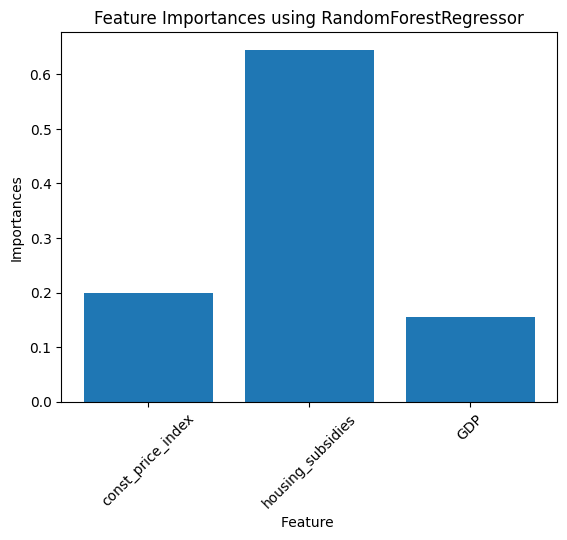

In [26]:
importances = randomForest.feature_importances_

sort_importances = np.argsort(importances)[::-1]


# Plotting importances
plt.title("Feature Importances using RandomForestRegressor")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [predictors[i] for i in sort_importances], rotation=45)
plt.xlabel('Feature ')
plt.ylabel('Importances')
plt.show()

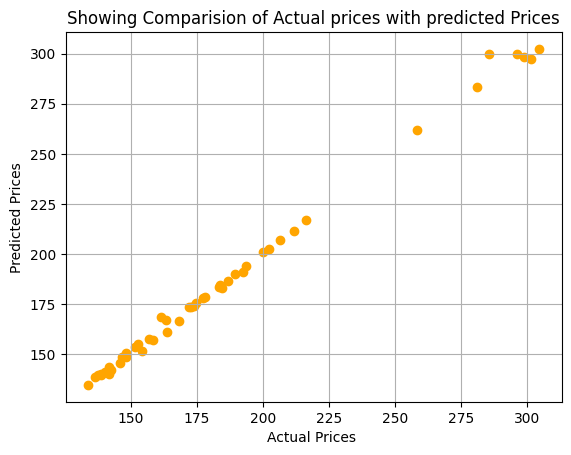

In [27]:
# Compare Actual prices with predicted Prices

plt.scatter(y_test, randomForestPredictions, color='orange')
plt.xlabel('Actual Prices ')
plt.ylabel('Predicted Prices')
plt.title('Showing Comparision of Actual prices with predicted Prices')
plt.grid(True)
plt.show()


In [28]:
# Calculate the total Rmse to comapre randomForestRegressor performance/accuracy with other models
rmse = np.sqrt(mean_squared_error(y_test, randomForestPredictions))
print(" RandomForestRegressor Rmse:", rmse)

 RandomForestRegressor Rmse: 2.8716979691650892


In [29]:
# Find the average differences betwenn the predicted values and the actual values in the dataset

populated_mae = mean_absolute_error(y_test,randomForestPredictions)

print("Random Forest Predictions MAE: ",populated_mae)


Random Forest Predictions MAE:  1.7457491560019591


In [30]:
# Cross Validation calculation
dataset_fold_size = 5
fold_obj = KFold(n_splits= dataset_fold_size, shuffle=True, random_state=42)
cvs = cross_val_score(randomForest, X_train, y_train, scoring='neg_mean_squared_error')
cvs = - cvs

# Calcualte the total mean

mean_val_cvs = cvs.mean()

# standard divion computation
std_val_cvs = cvs.std()

# Print the results of Cross Validation Mean and Std

print("Cross Validation Mean", np.sqrt(mean_val_cvs))
print("Cross Validation STD: ", np.sqrt(std_val_cvs))

Cross Validation Mean 3.4452790305717724
Cross Validation STD:  2.85862062549357


In [31]:

# PolynomialFeatures

poly = PolynomialFeatures(degree=2)

poly_train = poly.fit_transform(X_train)
poly_test = poly.transform(X_test)

p_train = poly_train.T
p_test = poly_test.T

# converting to dataframe to organize

pd.set_option('display.float_format', lambda x: '%.2f' % x)

train_dataFrame = pd.DataFrame(p_train.round(2))
test_dataFrame = pd.DataFrame(p_test.round(2))
print("Train Data Frame\n")
print(train_dataFrame , "\n")
print("Test Data Frame\n")
print(test_dataFrame)
# randomForest.fit(poly_train, poly_test)

# randomForestPredictions = randomForest.predict(poly_test)



Train Data Frame

           0            1            2            3            4    \
0         1.00         1.00         1.00         1.00         1.00   
1       215.50       184.30       233.40       239.60       234.30   
2     18406.94     16843.00     20665.55     20276.15     19034.83   
3        33.81        29.88        44.15        38.86        44.15   
4     46440.25     33966.49     54475.56     57408.16     54896.49   
5   3966695.79   3104165.45   4823340.07   4858166.50   4459860.67   
6      7285.19      5506.15     10303.91      9310.62     10343.64   
7 338815476.98 283686750.06 427065080.80 411122421.03 362324753.13   
8    622265.05    503201.56    912322.17    787911.07    840330.64   
9      1142.85       892.58      1948.96      1510.02      1948.96   

           5            6            7            8            9    ...  \
0         1.00         1.00         1.00         1.00         1.00  ...   
1       238.10       317.14       234.80       205.50       2

The End

In [32]:
!git clone https://github.com/rphurtado/datascienceproject.git


Cloning into 'datascienceproject'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 18.01 KiB | 9.01 MiB/s, done.
Resolving deltas: 100% (7/7), done.
